In [2]:
import random
import os
import numpy as np 
import cv2 
import matplotlib.pyplot as plt

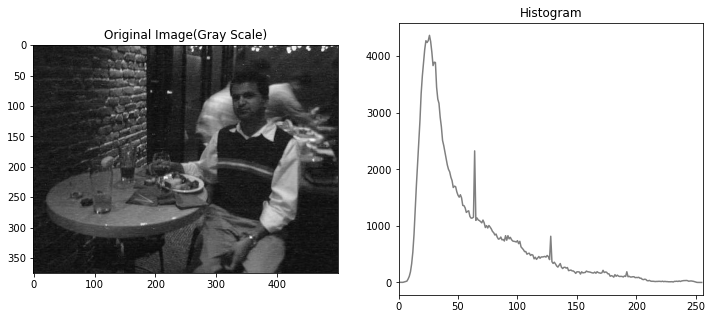

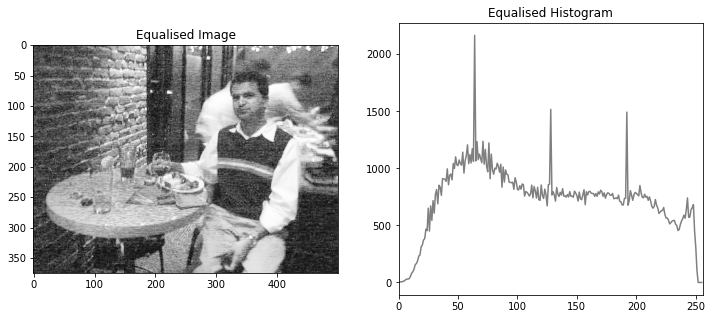

In [3]:
path = "/Users/deepshikhagupta/Downloads/Image Analysis and Computer Vision/VOCdevkit/VOC2012/JPEGImages/"
random_filename = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
])
img_path = path+random_filename
img1 = cv2.imread(img_path)
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

def show_histogram (image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 260])
    plt.plot(hist, color = 'gray')
    plt.xlim([0, 256])
    
def show_equalized_image(image):
    channels = cv2.split(image)
    eq_channels = []
    for ch, color in zip(channels, ['B', 'G', 'R']):
        eq_channels.append(cv2.equalizeHist(ch))

    eq_image = cv2.merge(eq_channels)
    eq_image = cv2.cvtColor(eq_image, cv2.COLOR_BGR2GRAY)
    return eq_image

def plot_img_sidebyside(image1,head1,head2):
    f = plt.figure(figsize=(12,5))
    f.add_subplot(1,2, 1)
    plt.imshow(image1,'gray'),plt.title(head1)
    f.add_subplot(1,2, 2)
    show_histogram(image1),plt.title(head2)
    plt.show(block=True)  
    
plot_img_sidebyside(img_gray,'Original Image(Gray Scale)', 'Histogram')
plot_img_sidebyside(show_equalized_image(img1),'Equalised Image', 'Equalised Histogram')    

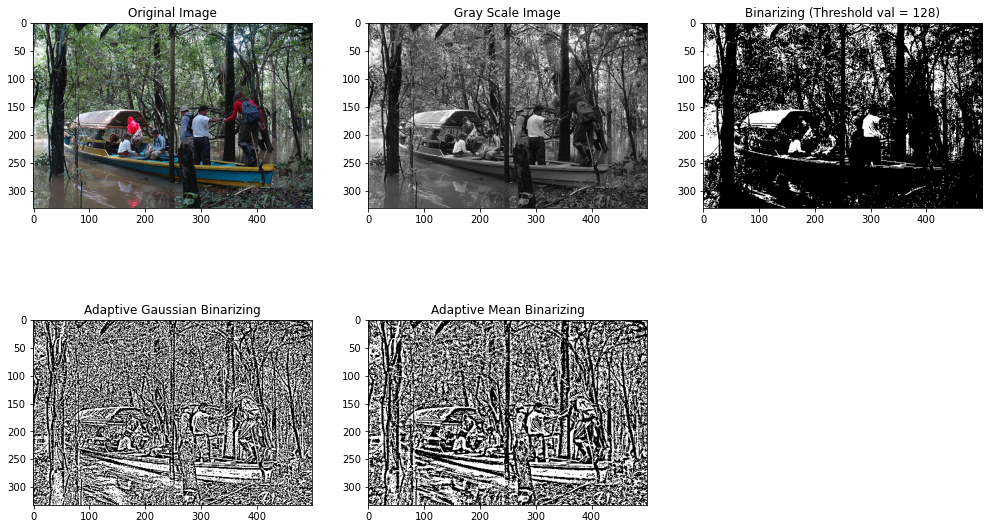

In [21]:
#Hardcoded Threshold value 128
ret,bin_img = cv2.threshold(img_gray,128,255,cv2.THRESH_BINARY)

#threshold value is the weighted sum of neighbourhood values where weights are a gaussian window
gaus_bin = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

#threshold value is the mean of neighbourhood area.
mean_bin = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
    
f = plt.figure(figsize=(17,10))
f.add_subplot(2,3, 1)
plt.imshow(img1),plt.title('Original Image')
f.add_subplot(2,3, 2)
plt.imshow(img_gray,'gray'),plt.title('Gray Scale Image')
f.add_subplot(2,3,3)
plt.imshow(bin_img,'gray'),plt.title('Binarizing (Threshold val = 128)')
f.add_subplot(2,3,4)
plt.imshow(gaus_bin,'gray'),plt.title('Adaptive Gaussian Binarizing')
f.add_subplot(2,3,5)
plt.imshow(mean_bin,'gray'),plt.title('Adaptive Mean Binarizing')
plt.show(block=True)       

In [22]:
#Image Statistics (Mean, Variance and Standard Daviation)

from PIL import Image, ImageOps
im = Image.open(img_path)
gray_scale = ImageOps.grayscale(im)
width, height = gray_scale.size
total_pixels = width * height
px = gray_scale.load()

sum_pixels = 0
for i in range(0, width):
    for j in range(0, height):
        sum_pixels += px[i,j]
        
mean = sum_pixels / total_pixels        
        
sq_total = 0
for i in range(0, width):
    for j in range(0, height):
        sq_total += (px[i,j]-mean)**2
        
var = sq_total/total_pixels        
std = var**(1/2)
print('mean value of pixels: ' + str(mean))
print('Variance value of pixels: ' + str(var))
print('Standard Daviation of pixels: ' + str(std))

mean value of pixels: 83.75556626506024
Variance value of pixels: 2894.0856617876416
Standard Daviation of pixels: 53.79670679314526
